In [ ]:
from utils import *

NOTEBOOK_ID = '23'
RUN_PADDLE = False

# run PADDLE on harmonized dataset

In [ ]:
if RUN_PADDLE:
    # run PADDLE on strong activators
    if not os.path.isfile(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/strong_predictions_paddle.pickle'):
        df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/11-harmonize_datasets/04-results/esm2_t33_650M_UR50D-layer33-representations.pkl').drop_duplicates(subset='AAseq')
        df = df[df['linear_harmonized_activity_scaled'] > df['linear_harmonized_activity_scaled'].mean() + df['linear_harmonized_activity_scaled'].std()]
        df = df.query('dataset != "Sanborn"').reset_index(drop=True)
        df['PADDLE_zscore'] = None
        df['PADDLE_activation'] = None
        for idx, row in df.iterrows():
            print(100*(idx/len(df)))
            zscore, act = predict_single_tile(row['AAseq'],use_SS=True)
            df.loc[idx,'PADDLE_zscore'] = zscore
            df.loc[idx,'PADDLE_activation'] = act
        df.to_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/strong_predictions_paddle.pickle')

    # run PADDLE on heldout dataset
    if not os.path.isfile(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/harmonized_test_predictions_paddle_fixed.pickle'):
        harmonized_test_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/12-quantify_uncertainty/01-dataset/harmonized_test_df.pkl').drop(columns='esm2_t33_650M_UR50D')
        harmonized_test_df = harmonized_test_df.reset_index(drop=True)
        harmonized_test_df['PADDLE_zscore'] = None
        harmonized_test_df['PADDLE_activation'] = None
        for idx, row in harmonized_test_df.iterrows():
            print(100*(idx/len(harmonized_test_df)))
            zscore, act = predict_single_tile(row['AAseq'],use_SS=True)
            harmonized_test_df.loc[idx,'PADDLE_zscore'] = zscore
            harmonized_test_df.loc[idx,'PADDLE_activation'] = act
        harmonized_test_df.to_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/harmonized_test_predictions_paddle_fixed.pickle')

    # run PADDLE on mycocosm
    if not os.path.isfile(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/harmonized_mycocosm_predictions_paddle.pickle'):
        mycocosm_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/11-harmonize_datasets/04-results/esm2_t33_650M_UR50D-layer33-representations.pkl').drop_duplicates(subset='AAseq')
        mycocosm_df = mycocosm_df.query('dataset == "Mycocosm"').reset_index(drop=True)
        mycocosm_df['PADDLE_zscore'] = None
        mycocosm_df['PADDLE_activation'] = None
        for idx, row in mycocosm_df.iterrows():
            print(100*(idx/len(mycocosm_df)))
            zscore, act = predict_single_tile(row['AAseq'],use_SS=True)
            mycocosm_df.loc[idx,'PADDLE_zscore'] = zscore
            mycocosm_df.loc[idx,'PADDLE_activation'] = act
        mycocosm_df.to_pickle(f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/harmonized_mycocosm_predictions_paddle.pickle')
    
    out_file = f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/initial_generalizability_paddle.pkl'
    if not os.path.isfile(out_file):
        df = pd.read_pickle('/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/13-evaluate_initial_generalizability/spectral_cluster_dataset.pkl').query('cluster == 2')
        df['PADDLE_zscore'] = None
        df['PADDLE_activation'] = None
        for idx, row in df.iterrows():
            print(100*(idx/len(df)))
            zscore, act = predict_single_tile(row['AAseq'],use_SS=True)
            df.loc[idx,'PADDLE_zscore'] = zscore
            df.loc[idx,'PADDLE_activation'] = act
        df.to_pickle(out_file)

    out_file = f'/data/lucas/01-experiments/eLW028-activator_prediction/02-OUTPUT/28-compare_model_PADDLE/updated_generalizability_paddle.pkl'
    if not os.path.isfile(out_file):
        df = pd.read_pickle('/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/21-evaluate_updated_generalizability/spectral_cluster_dataset.pkl').query(f'cluster == 2')
        df['PADDLE_zscore'] = None
        df['PADDLE_activation'] = None
        for idx, row in df.iterrows():
            print(100*(idx/len(df)))
            zscore, act = predict_single_tile(row['AAseq'],use_SS=True)
            df.loc[idx,'PADDLE_zscore'] = zscore
            df.loc[idx,'PADDLE_activation'] = act
        df.to_pickle(out_file)

    harmonized_test_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/28-compare_model_PADDLE/harmonized_test_predictions_paddle_fixed.pickle')
    tmp_df = harmonized_test_df
    tmp_df['PADDLE_zscore'] = None
    tmp_df['PADDLE_activation'] = None
    for idx, row in tmp_df.iterrows():
        print(100*(idx/len(tmp_df)))
        zscore, act = predict_single_tile(row['AAseq'],use_SS=False)
        tmp_df.loc[idx,'PADDLE_zscore'] = zscore
        tmp_df.loc[idx,'PADDLE_activation'] = act
    tmp_df.to_pickle(f'harmonized_test_noSS.pickle')
else:
    harmonized_strong_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/28-compare_model_PADDLE/strong_predictions_paddle.pickle')
    harmonized_test_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/28-compare_model_PADDLE/harmonized_test_predictions_paddle_fixed.pickle')
    harmonized_mycocosm_df = pd.read_pickle(f'/data/lucas/01-experiments/eLW028-active_learning/02-OUTPUT/28-compare_model_PADDLE/harmonized_test_predictions_paddle_fixed.pickle')

# evaluate PADDLE predictions

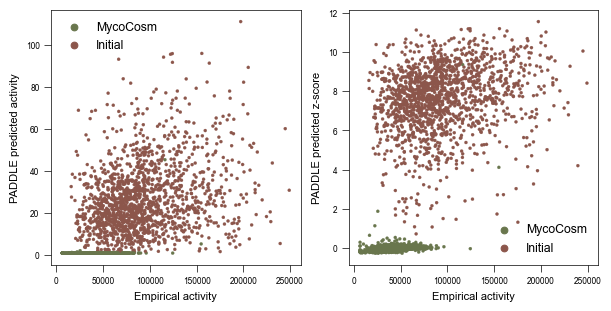

In [26]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(6,3),sharey=False,constrained_layout=True)
harmonized_test_df['dataset'] = harmonized_test_df['dataset'].replace({'Mycocosm':'MycoCosm','Hummel':'Initial'})
harmonized_test_df = harmonized_test_df.query('dataset != "Sanborn"')
g = sns.scatterplot(data=harmonized_test_df,x='linear_harmonized_activity',y='PADDLE_activation',
                    edgecolor=None,s=5,ax=axes[0],hue='dataset',hue_order=['MycoCosm','Initial'],palette=['#69764d',COLORS[10]])
g.set(xlabel='Empirical activity',ylabel='PADDLE predicted activity')
g.legend(frameon=False)

g = sns.scatterplot(data=harmonized_test_df,x='linear_harmonized_activity',y='PADDLE_zscore',
                    edgecolor=None,s=5,ax=axes[1],hue='dataset',hue_order=['MycoCosm','Initial'],palette=['#69764d',COLORS[10]])
g.set(xlabel='Empirical activity',ylabel='PADDLE predicted z-score')
g.legend(frameon=False);
plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-paddle_harmonized.png',dpi=600,bbox_inches='tight',transparent=False)

In [6]:
r = pearsonr(harmonized_test_df['linear_harmonized_activity'],harmonized_test_df['PADDLE_zscore'])[0]
rmse = mean_squared_error(preprocessing.MinMaxScaler().fit_transform(harmonized_test_df['linear_harmonized_activity'].to_numpy().reshape(-1,1)),preprocessing.MinMaxScaler().fit_transform(harmonized_test_df['PADDLE_zscore'].to_numpy().reshape(-1,1)),squared=False)
print('PADDLE on harmonized test dataset',r,rmse)

PADDLE on harmonized test dataset 0.5499427526666606 0.31320971591825847


In [7]:
tmp_df = harmonized_test_df.query('dataset == "Mycocosm"')
r = pearsonr(tmp_df['linear_harmonized_activity'],tmp_df['PADDLE_zscore'])[0]
rmse = mean_squared_error(preprocessing.MinMaxScaler().fit_transform(tmp_df['linear_harmonized_activity'].to_numpy().reshape(-1,1)),preprocessing.MinMaxScaler().fit_transform(tmp_df['PADDLE_zscore'].to_numpy().reshape(-1,1)),squared=False)
print('PADDLE on harmonized test dataset',r,rmse)

PADDLE on harmonized test dataset 0.2870356681093455 0.2681105885873564


In [8]:
new_dataset = pd.read_csv(f'{HARMONIZE_DIR}/04-results/active_learning_activity.csv')
new_dataset = new_dataset[['dataset','DNAseq','Activity']]
new_dataset = (new_dataset
        .query('dataset == "sort_2" or dataset == "sort_2_noPCR1"')
        .groupby(['DNAseq'])['Activity']
        .mean()
        .reset_index()
        .dropna()
        .reset_index(drop=True)
        .rename(columns={'Activity':'new_activity'})
        )
new_dataset['AAseq'] = new_dataset['DNAseq'].apply(lambda x: str(Seq(x).translate()))
new_dataset['new_activity_scaled'] = preprocessing.MinMaxScaler().fit_transform(new_dataset['new_activity'].to_numpy().reshape(-1,1))
df = pd.read_pickle(f'{PADDLE_DIR}/harmonized_mycocosm_predictions_paddle.pickle')[['AAseq','PADDLE_zscore','PADDLE_activation']]
merged_df = new_dataset.merge(df,on='AAseq')
harmonized_df = pd.read_csv(f'{HARMONIZE_DIR}/04-results/new_to_old_harmonized_dataset.csv').query('dataset != "Mycocosm_Overlap"').drop_duplicates(subset='AAseq',keep=False)
harmonized_df = harmonized_df[['dataset','AAseq','linear_harmonized_activity_scaled','linear_harmonized_activity']]
paddle_mycocosm_df = pd.concat([merged_df,pd.read_pickle(f'{PADDLE_DIR}/remaining_paddle_mycocosm.pickle')])
paddle_mycocosm_df = paddle_mycocosm_df.merge(harmonized_df,on='AAseq')
paddle_mycocosm_df['PADDLE_zscore_scaled'] = preprocessing.MinMaxScaler().fit_transform(paddle_mycocosm_df['PADDLE_zscore'].to_numpy().reshape(-1,1))
paddle_mycocosm_df['PADDLE_activation_scaled'] = preprocessing.MinMaxScaler().fit_transform(paddle_mycocosm_df['PADDLE_activation'].to_numpy().reshape(-1,1))

In [9]:
r = pearsonr(paddle_mycocosm_df['linear_harmonized_activity_scaled'],paddle_mycocosm_df['PADDLE_zscore'])[0]
rmse = mean_squared_error(paddle_mycocosm_df['linear_harmonized_activity_scaled'],paddle_mycocosm_df['PADDLE_zscore'],squared=False)
print('PADDLE on MycoCosm test:', r, rmse)

PADDLE on MycoCosm test: 0.6066915379319078 2.0666079374721584


# PADDLE on hummel

In [13]:
hummel_paddle_df = pd.read_csv(f'{DATASET_DIR}/01-hummel/niklas_paddle_predictions.csv').drop_duplicates('Seq')
test = pd.read_csv(f'{LIBRARY_DIR}/hummel_test.csv').rename(columns={'aa_seq':'AAseq'})
hummel_paddle_df = hummel_paddle_df[hummel_paddle_df['Seq'].isin(test['AAseq'])]

r = pearsonr(hummel_paddle_df['Activity_500k_Rat'],hummel_paddle_df['PADDLE_zscore'])[0]
rmse = mean_squared_error(preprocessing.MinMaxScaler().fit_transform(hummel_paddle_df['Activity_500k_Rat'].to_numpy().reshape(-1,1)),preprocessing.MinMaxScaler().fit_transform(hummel_paddle_df['PADDLE_zscore'].to_numpy().reshape(-1,1)),squared=False)
print('PADDLE on hummel:',r,rmse)

PADDLE on hummel: 0.261000300141848 0.336389815273718


In [14]:
r = pearsonr(hummel_paddle_df['Activity_500k_Rat'],hummel_paddle_df['PADDLE_noSS_zscore'])[0]
rmse = mean_squared_error(preprocessing.MinMaxScaler().fit_transform(hummel_paddle_df['Activity_500k_Rat'].to_numpy().reshape(-1,1)),preprocessing.MinMaxScaler().fit_transform(hummel_paddle_df['PADDLE_noSS_zscore'].to_numpy().reshape(-1,1)),squared=False)
print('PADDLE on hummel:',r,rmse)

PADDLE on hummel: 0.3380220349835903 0.32930265293646627
